In [1]:
import pandas as pd
import numpy as np
import yaml
import math
import os
import matplotlib.pyplot as plt
import scipy.stats

min_overs = 300
min_pair_overs = 60  # 1/5th of min_overs

In [2]:
og_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/Main Stuff/odiout.csv')
bovercnt = og_data.groupby('bowler').count()
bovercnt = bovercnt.drop(['runs', 'wicket'], axis =1)
qbovercnt = bovercnt.loc[bovercnt['over'] >= min_overs]

pd.set_option('display.max_rows', 10000)
len(qbovercnt)

80

In [3]:
paired_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/Main Stuff/odipair.csv')
paired_data

,runs1,wicket1,over1,bowler1,runs2,wicket2,over2,bowler2
0,10,0,1,Z Khan,2,0,2,P Kumar
1,2,0,3,Z Khan,2,0,4,P Kumar
2,1,0,5,Z Khan,2,0,6,P Kumar
3,2,0,7,Z Khan,9,0,8,P Kumar
4,5,0,9,Z Khan,8,0,10,P Kumar
...,...,...,...,...,...,...,...,...
46915,1,0,39,Kuldeep Yadav,7,0,40,YS Chahal
46916,4,0,41,Kuldeep Yadav,1,0,42,B Kumar
46917,11,0,43,YS Chahal,4,0,44,B Kumar
46918,4,0,45,YS Chahal,3,0,46,JJ Bumrah


In [4]:
pairdf = paired_data.groupby(['bowler1','bowler2']).size().append(paired_data.groupby(['bowler2','bowler1']).size())

In [5]:
#names = og_data['bowler'].unique()
bnames = qbovercnt.index
Bpartners = {}
for name in bnames:
    Bpartners[name] = []
    Bpartners[name] = paired_data.query('bowler1 == @name')['bowler2'].append(paired_data.query('bowler2 == @name')['bowler1']).unique()

len(Bpartners)

80

In [6]:
paircnt = 0 
for k, v in Bpartners.items():
    for name in v:
        povercnt = pairdf[k][name].sum()
        if (povercnt >= min_pair_overs):
            if(k<name):
                print(k,name, povercnt)
                paircnt += 1

AD Mathews NLTC Perera 61
AD Mathews KMDN Kulasekara 61
AU Rashid MM Ali 167
AU Rashid LE Plunkett 72
Abdur Razzak Shakib Al Hasan 130
Abdur Razzak Mahmudullah 68
B Kumar JJ Bumrah 121
B Kumar Mohammed Shami 95
B Lee NW Bracken 78
CH Gayle DJ Bravo 64
DJ Bravo DJG Sammy 67
DL Vettori SB Styris 87
DL Vettori JDP Oram 66
DW Steyn M Morkel 71
Dawlat Zadran Mujeeb Ur Rahman 65
Harbhajan Singh Yuvraj Singh 93
JM Anderson TT Bresnan 86
JM Anderson SCJ Broad 166
JM Anderson ST Finn 63
JO Holder SS Cottrell 63
KD Mills TG Southee 84
KMDN Kulasekara SL Malinga 166
M Muralitharan ST Jayasuriya 61
M Ntini SM Pollock 158
MG Johnson SR Watson 64
Mahmudullah Shakib Al Hasan 89
Mashrafe Mortaza Syed Rasel 74
Mashrafe Mortaza Shakib Al Hasan 95
Mashrafe Mortaza Shahadat Hossain 60
Mashrafe Mortaza Mustafizur Rahman 67
Mohammad Hafeez Shahid Afridi 178
Mohammad Hafeez Saeed Ajmal 73
Mohammad Nabi Rashid Khan 101
P Utseya RW Price 70
R Ashwin RA Jadeja 198
Rubel Hossain Shakib Al Hasan 66
SC Williams Si

In [7]:
bocnt = 0 
Bpartner_qualified = {}
for k, v in Bpartners.items():
    Bpartner_qualified[k] = []
    for name in v:
        bocnt = pairdf[k][name].sum()
        if (bocnt >= min_pair_overs):
            Bpartner_qualified[k].append(name)

for k,v in Bpartners.items():
    if Bpartner_qualified[k] == []:
        del Bpartner_qualified[k]
            
#Bpartner_qualified
print(len(Bpartner_qualified))
print(Bpartner_qualified)

#Bpartner_qualified.keys()

53
{'AD Mathews': ['NLTC Perera', 'KMDN Kulasekara'], 'AU Rashid': ['MM Ali', 'LE Plunkett'], 'Abdur Razzak': ['Shakib Al Hasan', 'Mahmudullah'], 'B Kumar': ['JJ Bumrah', 'Mohammed Shami'], 'B Lee': ['NW Bracken'], 'CH Gayle': ['DJ Bravo'], 'DJ Bravo': ['CH Gayle', 'DJG Sammy'], 'DJG Sammy': ['DJ Bravo'], 'DL Vettori': ['SB Styris', 'JDP Oram'], 'DW Steyn': ['M Morkel'], 'Dawlat Zadran': ['Mujeeb Ur Rahman'], 'Harbhajan Singh': ['Yuvraj Singh'], 'JDP Oram': ['DL Vettori'], 'JJ Bumrah': ['B Kumar'], 'JM Anderson': ['TT Bresnan', 'SCJ Broad', 'ST Finn'], 'JO Holder': ['SS Cottrell'], 'KD Mills': ['TG Southee'], 'KMDN Kulasekara': ['AD Mathews', 'SL Malinga'], 'LE Plunkett': ['AU Rashid'], 'M Morkel': ['DW Steyn'], 'M Muralitharan': ['ST Jayasuriya'], 'M Ntini': ['SM Pollock'], 'MA Starc': ['JR Hazlewood'], 'MG Johnson': ['SR Watson'], 'MM Ali': ['AU Rashid'], 'Mahmudullah': ['Abdur Razzak', 'Shakib Al Hasan'], 'Mashrafe Mortaza': ['Syed Rasel', 'Shakib Al Hasan', 'Shahadat Hossain', 'Mus

In [9]:
Bowlers_x = []
Bowlership_x = []
Bowler_Econ = []
Bowlership_Econ = []

Bowlers_x_knot = []
Bowlership_x_knot = []
Bowler_Econ_knot = []
Bowlership_Econ_knot = []

from collections import Counter 
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu

#with open("econ-edges.csv",'w') as fw:
for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:
        #print(name,pname)
        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]

        dict_1 = Counter(dict(dfpairab['runs1'].value_counts())) 
        dict_2 = Counter(dict(dfpairba['runs2'].value_counts()))
        fin_dict = dict(dict_1 + dict_2)
        fin_df = pd.DataFrame(fin_dict.items())

        pure_dict = dict(dfbowler['runs'].value_counts())
        #plt.bar(*zip(*pure_dict.items()),color='g',width=1.0)
        #plt.bar(*zip(*fin_dict.items()),color='y',width=1.0)

        #plt.show()

        s=0
        d=0
        for k,v in pure_dict.items():
            s = s + k*v
            d = d + v
        be = s/d
        #print("Bowler's Economy  : ",be)
        s=0
        d=0
        for k,v in fin_dict.items():
            s = s + k*v
            d = d + v
        bse = s/d 
        #print("Bowlership's Economy  : ",bse)
        #print('\n')

        #print("Bowler's Skew     : ",skew(dfbowler['runs'].dropna()))
        #print("Bowlership's Skew : ",skew((fin_df[1].dropna())))

        #print("Bowler's Kurtosis     : ",kurtosis(dfbowler['runs'].dropna()))
        #print("Bowlership's Kurtosis : ",kurtosis((fin_df[1].dropna())))

        #print('\n')

        alpha = 0.05

        batch_1 = dfbowler['runs'].value_counts()
        batch_2 = fin_df[1]

        stat1, p_value1 = mannwhitneyu(batch_1, batch_2, alternative="greater") 
        #print('Greater : Statistics=%.2f, p=%.2f ' % (stat1, p_value1)) 

        #if p_value1 < alpha: 
            #print('Reject Null Hypothesis => bowler NOT GREATER than bowlership') 
        #else: 
            #print('Do not Reject Null Hypothesis => batch1 GREATER THAN EQUAL TO batch2')

        stat2, p_value2 = mannwhitneyu(batch_1, batch_2, alternative="two-sided") 
        #print('Two-Sided : Statistics=%.2f, p=%.2f ' % (stat2, p_value2)) 

        #if p_value2 < alpha: 
            #print('Reject Null Hypothesis => bowler NOT EQUAL to bowlership') 
        #else: 
            #print('Do not Reject Null Hypothesis => batch1 is EQUAL to batch2')

        stat3, p_value3 = mannwhitneyu(batch_1, batch_2, alternative="less") 
        #print('Less : Statistics=%.2f, p=%.2f \n' % (stat3, p_value3)) 

        #if p_value3 < alpha: 
            #print('Reject Null Hypothesis => batch1 NOT LESS than batch2') 
        #else: 
            #print('Do not Reject Null Hypothesis => batch1 LESS THAN EQUAL TO batch2')

        if (p_value1 < alpha) and (p_value2 < alpha):
            print(name,",",pname)
            Bowlers_x.append(name)
            Bowlership_x.append(name + "-" + pname)
            Bowler_Econ.append(be)
            Bowlership_Econ.append(bse)
            #fw.write(name+','+pname+'\n')
        else:
            Bowlers_x_knot.append(name)
            Bowlership_x_knot.append(name + "-" + pname)
            Bowler_Econ_knot.append(be)
            Bowlership_Econ_knot.append(bse)
        
            
        #print('____________________________________________\n\n')
#fw.close()      
#print(fin_dict)
#print(fin_df)

AD Mathews , NLTC Perera
AD Mathews , KMDN Kulasekara
Abdur Razzak , Shakib Al Hasan
Abdur Razzak , Mahmudullah
B Lee , NW Bracken
CH Gayle , DJ Bravo
DJ Bravo , CH Gayle
DJ Bravo , DJG Sammy
DJG Sammy , DJ Bravo
DL Vettori , SB Styris
DL Vettori , JDP Oram
DW Steyn , M Morkel
JJ Bumrah , B Kumar
JM Anderson , TT Bresnan
JM Anderson , SCJ Broad
JM Anderson , ST Finn
KD Mills , TG Southee
KMDN Kulasekara , AD Mathews
M Morkel , DW Steyn
M Muralitharan , ST Jayasuriya
MA Starc , JR Hazlewood
MG Johnson , SR Watson
Mahmudullah , Abdur Razzak
Mashrafe Mortaza , Syed Rasel
Mashrafe Mortaza , Shakib Al Hasan
Mashrafe Mortaza , Shahadat Hossain
Mashrafe Mortaza , Mustafizur Rahman
Mohammad Hafeez , Saeed Ajmal
Mohammad Nabi , Rashid Khan
Mohammed Shami , B Kumar
NLTC Perera , AD Mathews
P Kumar , A Nehra
P Utseya , RW Price
R Ashwin , RA Jadeja
RA Jadeja , R Ashwin
Rubel Hossain , Shakib Al Hasan
SCJ Broad , TT Bresnan
SCJ Broad , JM Anderson
ST Finn , JM Anderson
Shahid Afridi , Saeed Ajmal


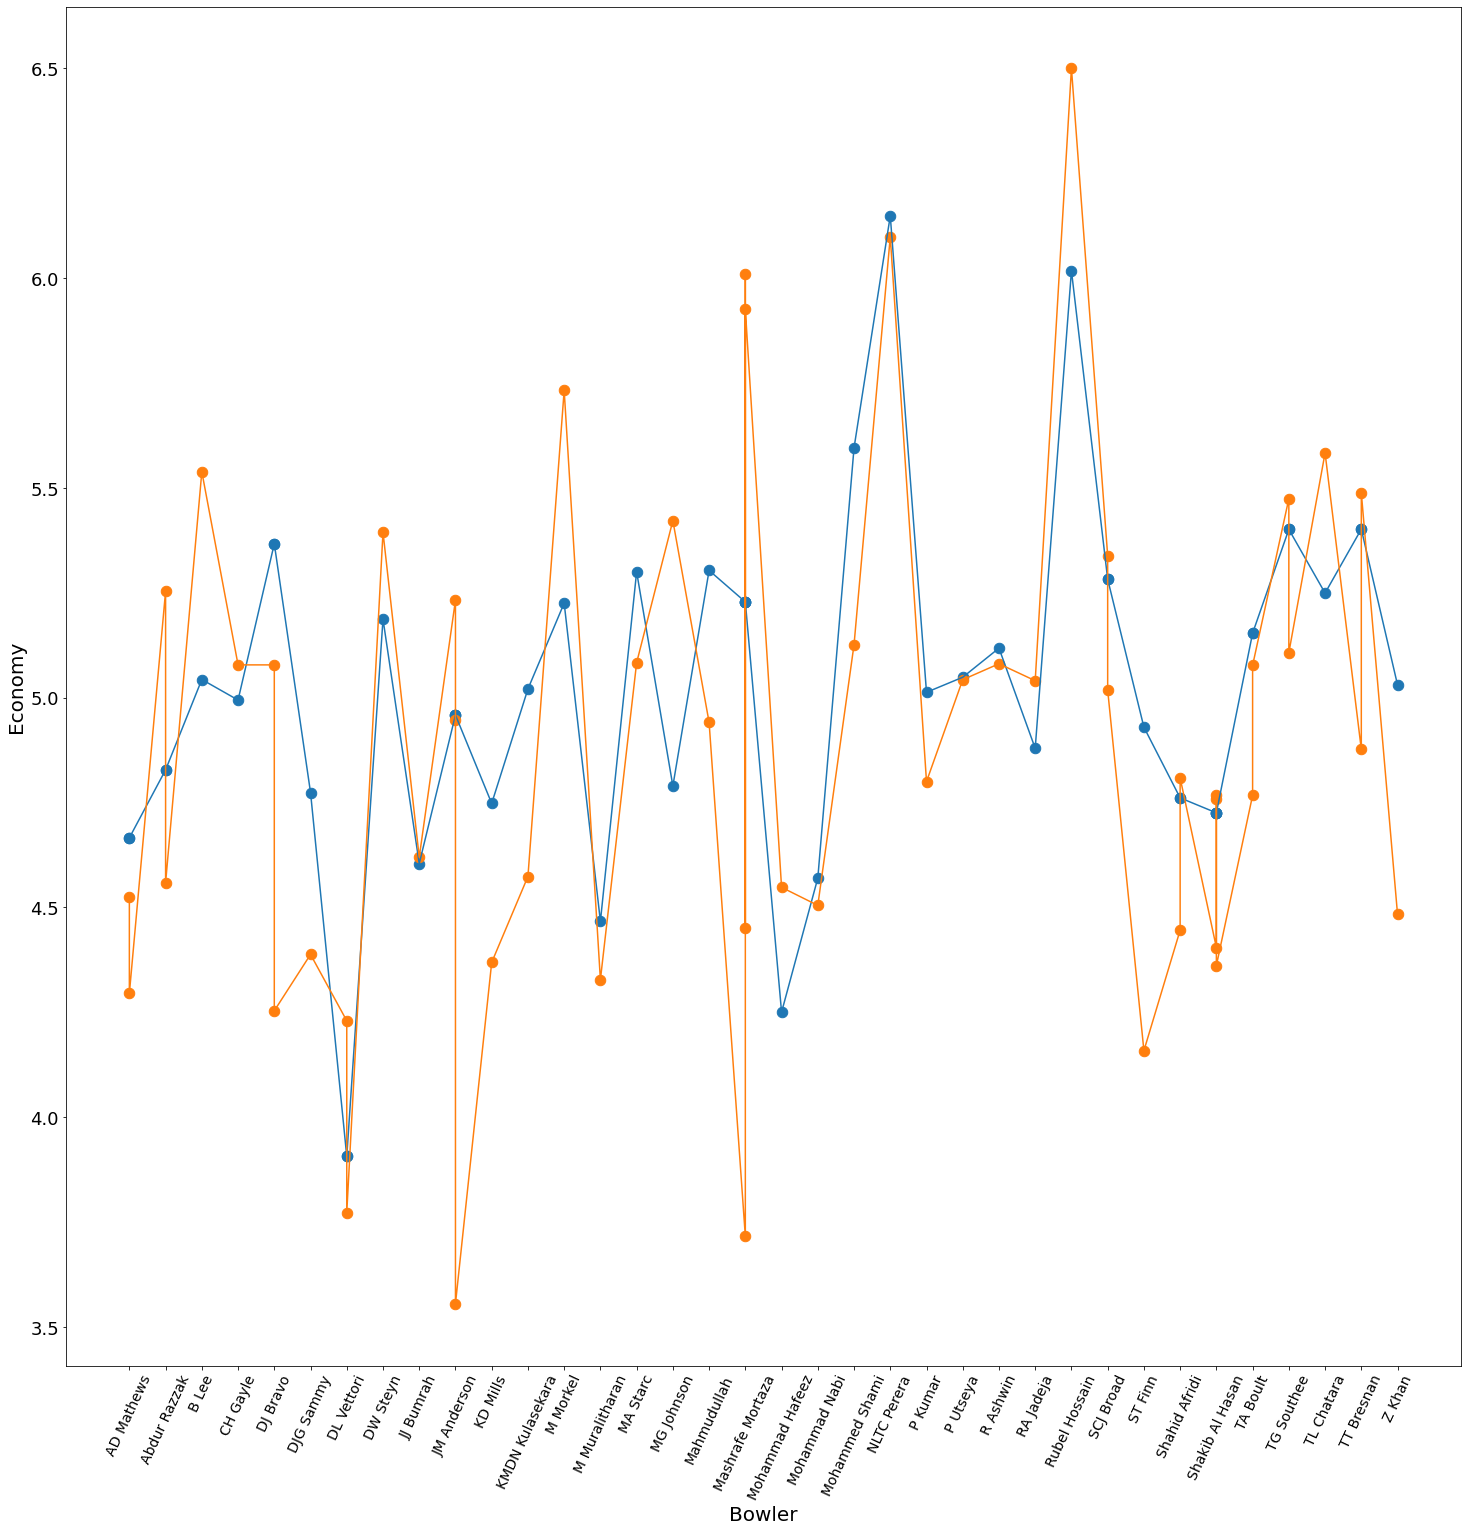

In [30]:
import matplotlib
from matplotlib import rc, rcParams

Bowler_set = list(set(Bowlers_x))
Econ_set = list(set(Bowler_Econ))

font = {'size'   : 10}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize = (25,25))
plt.xlabel("Bowler",fontsize = 20)
plt.ylabel("Economy", fontsize = 20)

plt.xticks(rotation=65, fontsize=14)
plt.yticks(fontsize=18)

for Y in [Bowler_Econ,Bowlership_Econ]:
    ax.scatter(Bowlers_x, Y, s=110)
    plt.plot(Bowlers_x, Y)

plt.savefig('/home/pnans/Documents/Projects/Bowlership/Paper/Images/ODI/bowlership-eco-scatter-odi.png', dpi=300, bbox_inches='tight', transparent = True)
#for i, txt in enumerate(name):
#   ax.annotate(txt, (Bowlers_x[i], Bowler_Econ[i]))

In [31]:
bowler_improv = list(np.array(Bowler_Econ) - np.array(Bowlership_Econ))
bowler_improv = list(100*np.array(bowler_improv)/np.array(Bowler_Econ))

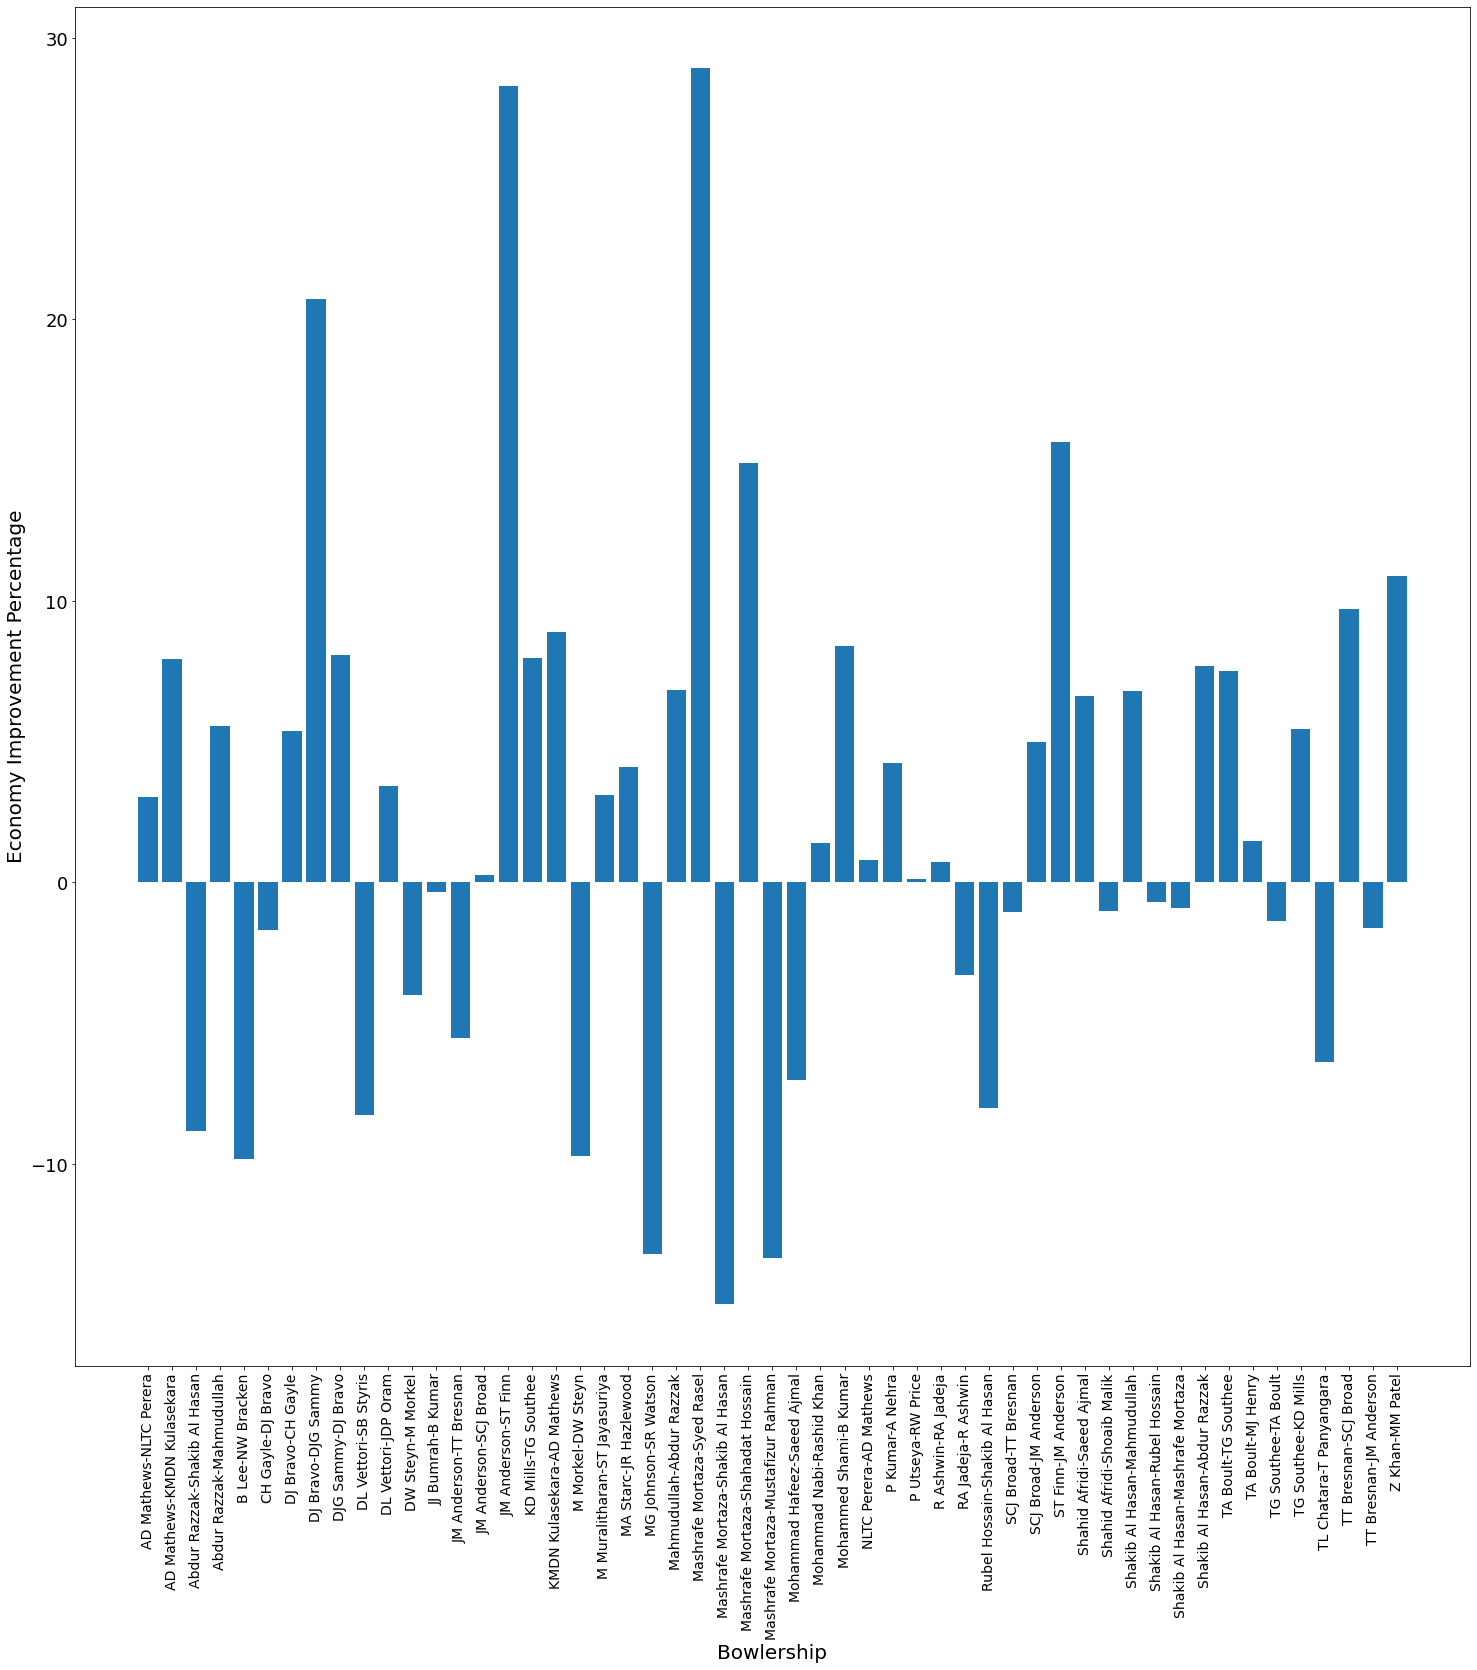

In [32]:
import matplotlib
from matplotlib import rc, rcParams

font = {'size'   : 10}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize = (25,25))
plt.xlabel("Bowlership",fontsize = 20)
plt.ylabel("Economy Improvement Percentage", fontsize = 20)

plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=18)

plt.bar(Bowlership_x, bowler_improv)
plt.savefig('/home/pnans/Documents/Projects/Bowlership/Paper/Images/ODI/bowlership-%-improv-odi.png', dpi=300, bbox_inches='tight', transparent = True)



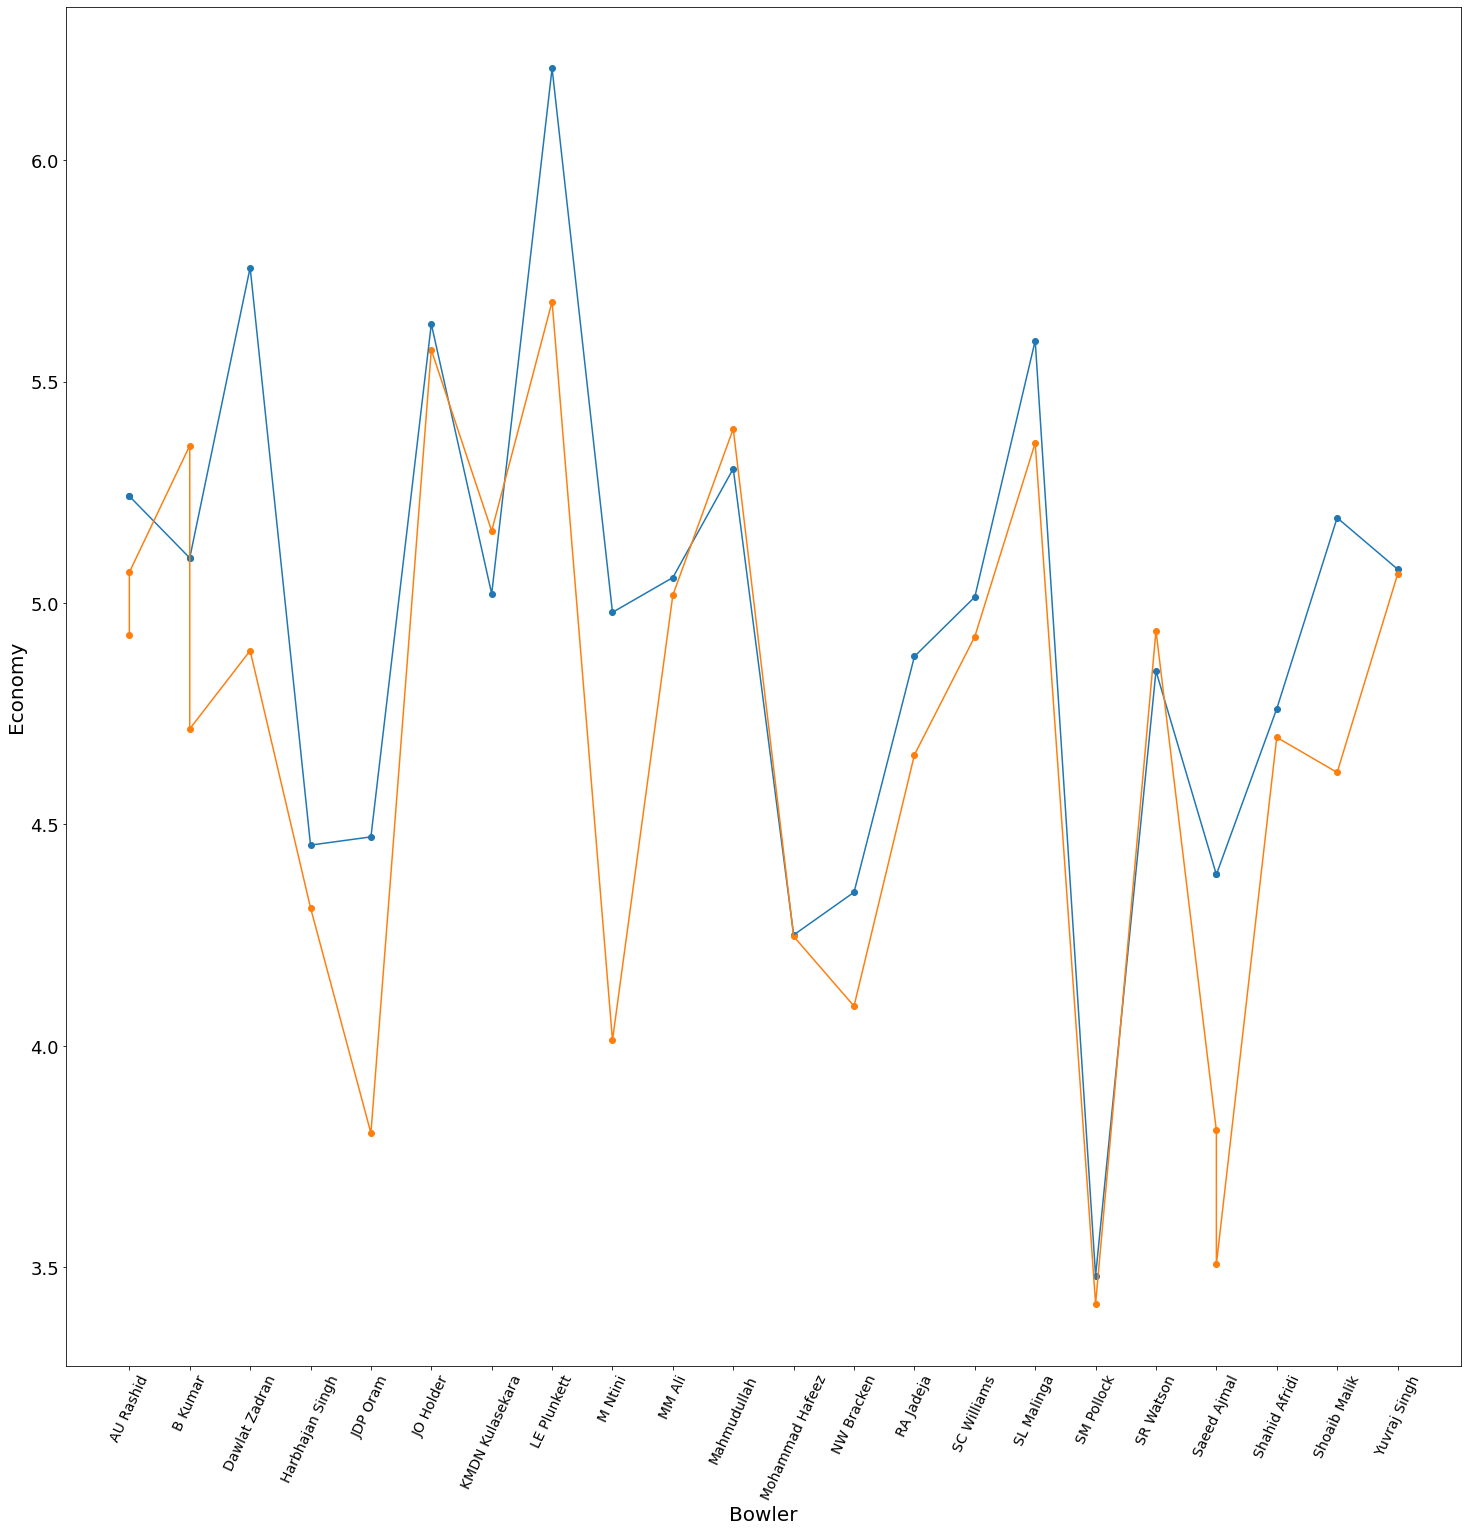

In [33]:
import matplotlib
from matplotlib import rc, rcParams

font = {'size'   : 10}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize = (25,25))
plt.xlabel("Bowler",fontsize = 20)
plt.ylabel("Economy", fontsize = 20)

plt.xticks(rotation=65, fontsize=14)
plt.yticks(fontsize=18)

for Y in [Bowler_Econ_knot, Bowlership_Econ_knot]:
    ax.scatter(Bowlers_x_knot, Y)
    plt.plot(Bowlers_x_knot, Y)
    
plt.savefig('/home/pnans/Documents/Projects/Bowlership/Paper/Images/ODI/nonpositive-bowlership-eco-scatter-odi.png', dpi=300, bbox_inches='tight', transparent = True)


In [38]:
Bowlers_x = []
Bowlership_x = []
Bowler_Econ = []
Bowlership_Econ = []


from collections import Counter 
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu

for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:

        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]

        dict_1 = Counter(dict(dfpairab['runs1'].value_counts())) 
        dict_2 = Counter(dict(dfpairba['runs2'].value_counts()))
        fin_dict = dict(dict_1 + dict_2)
        fin_df = pd.DataFrame(fin_dict.items())

        pure_dict = dict(dfbowler['runs'].value_counts())

        s=0
        d=0
        for k,v in pure_dict.items():
            s = s + k*v
            d = d + v
        be = s/d

        s=0
        d=0
        for k,v in fin_dict.items():
            s = s + k*v
            d = d + v
        bse = s/d 
        
        alpha = 0.05

        batch_1 = dfbowler['runs'].value_counts()
        batch_2 = fin_df[1]

        stat1, p_value1 = mannwhitneyu(batch_1, batch_2, alternative="greater") 
        
        stat2, p_value2 = mannwhitneyu(batch_1, batch_2, alternative="two-sided") 
        
        stat3, p_value3 = mannwhitneyu(batch_1, batch_2, alternative="less") 
        
        if (p_value1 < alpha) and (p_value2 < alpha) and (be>bse):
        
            Bowlers_x.append(name)
            Bowlership_x.append(name + "-" + pname)
            Bowler_Econ.append(be)
            Bowlership_Econ.append(bse)
            

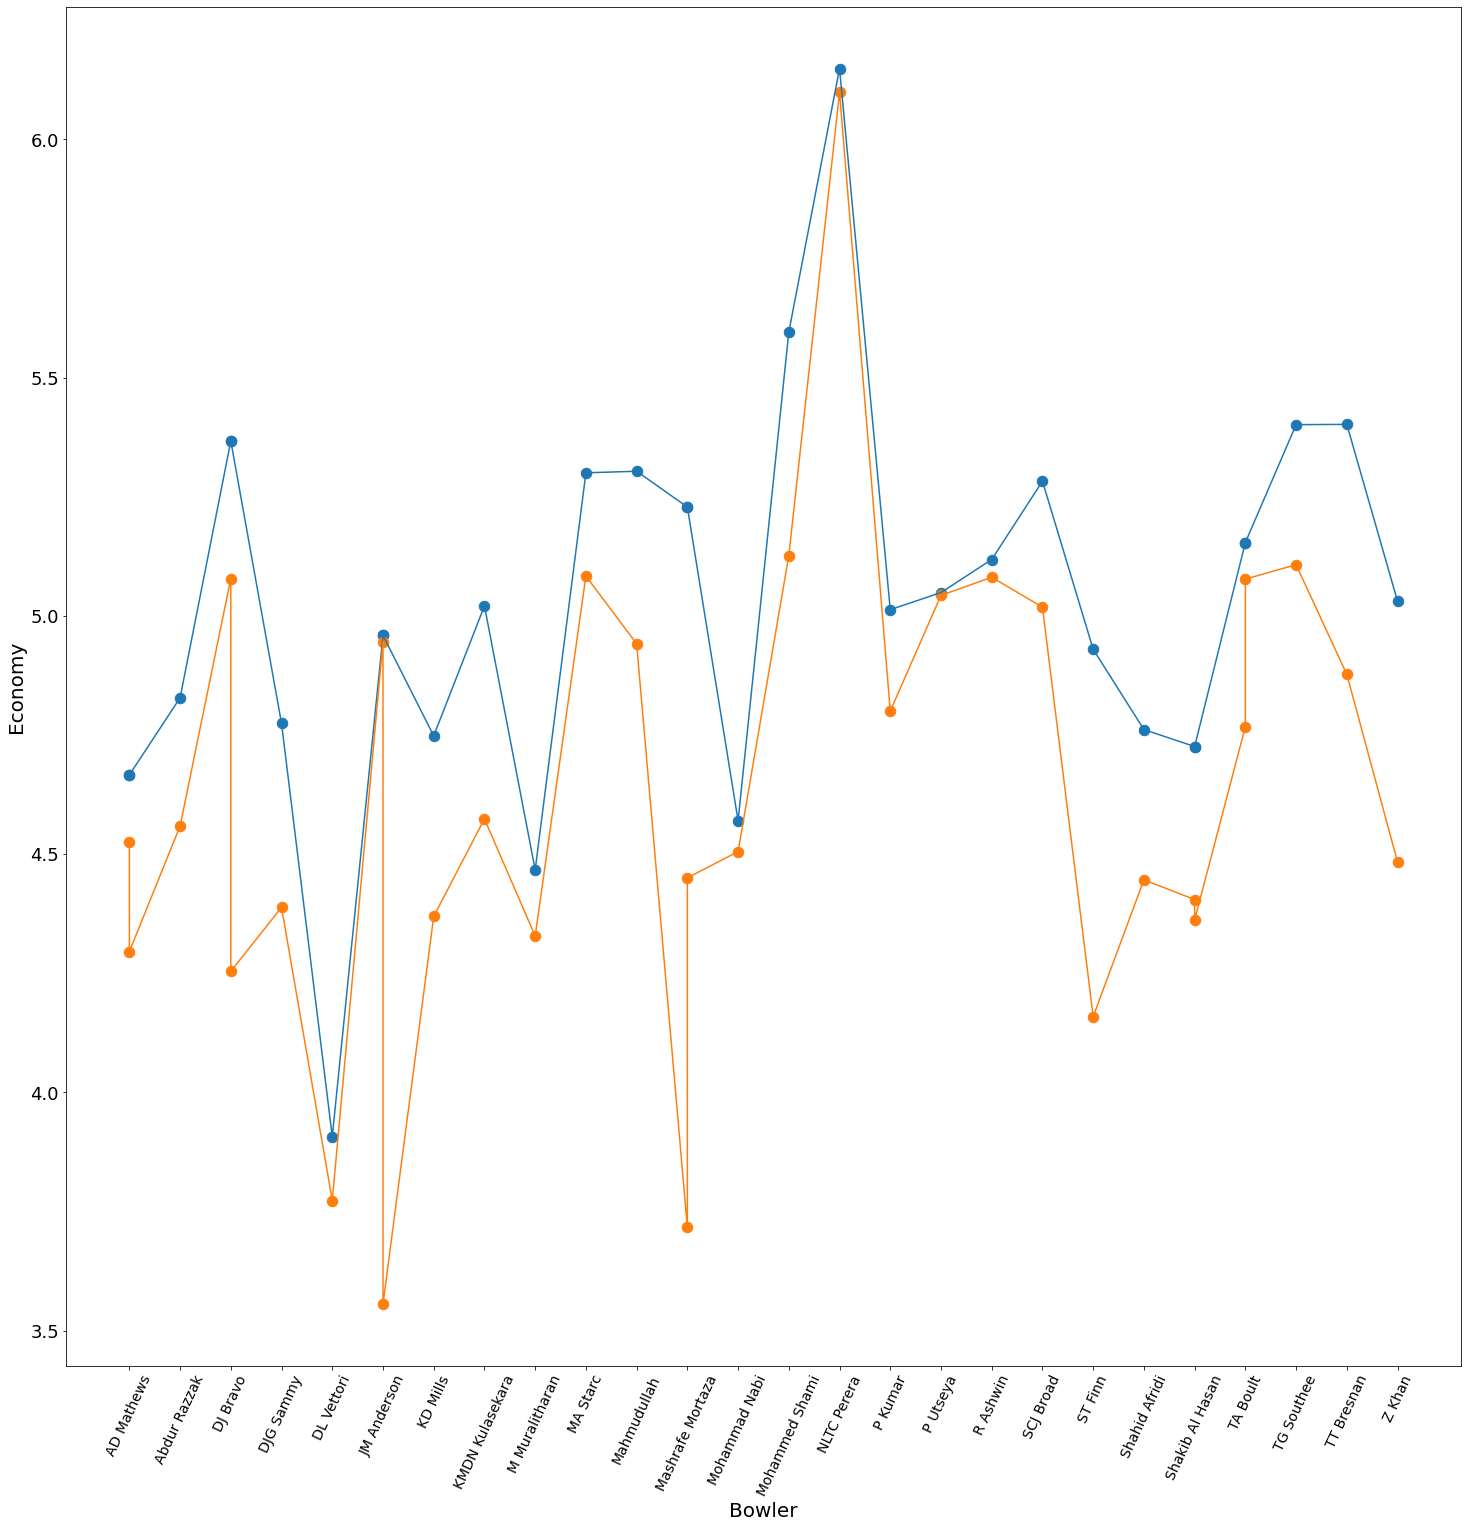

In [39]:
import matplotlib
from matplotlib import rc, rcParams

Bowler_set = list(set(Bowlers_x))
Econ_set = list(set(Bowler_Econ))

font = {'size'   : 10}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize = (25,25))
plt.xlabel("Bowler",fontsize = 20)
plt.ylabel("Economy", fontsize = 20)

plt.xticks(rotation=65, fontsize=14)
plt.yticks(fontsize=18)

for Y in [Bowler_Econ,Bowlership_Econ]:
    ax.scatter(Bowlers_x, Y, s=110)
    plt.plot(Bowlers_x, Y)

plt.savefig('/home/pnans/Documents/Projects/Bowlership/Paper/Images/ODI/bowlership-pos-eco-scatter-odi.png', dpi=300, bbox_inches='tight', transparent = True)


In [8]:
Bowl_x = []
Bowlship_x = []
Bowl_Econ = []
Bowlship_Econ = []


from collections import Counter 
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu


for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:
        
        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]

        dict_1 = Counter(dict(dfpairab['runs1'].value_counts())) 
        dict_2 = Counter(dict(dfpairba['runs2'].value_counts()))
        fin_dict = dict(dict_1 + dict_2)
        fin_df = pd.DataFrame(fin_dict.items())

        pure_dict = dict(dfbowler['runs'].value_counts())


        s=0
        d=0
        for k,v in pure_dict.items():
            s = s + k*v
            d = d + v
        be = s/d

        s=0
        d=0
        for k,v in fin_dict.items():
            s = s + k*v
            d = d + v
        bse = s/d 
        
        alpha = 0.05

        batch_1 = dfbowler['runs'].value_counts()
        batch_2 = fin_df[1]

        stat1, p_value1 = mannwhitneyu(batch_1, batch_2, alternative="greater") 
        
        stat2, p_value2 = mannwhitneyu(batch_1, batch_2, alternative="two-sided") 
        
        stat3, p_value3 = mannwhitneyu(batch_1, batch_2, alternative="less") 
        
        if (p_value1 < alpha) and (p_value2 < alpha) and (be>bse):
            print(name,",",pname)
        

AD Mathews , NLTC Perera
AD Mathews , KMDN Kulasekara
Abdur Razzak , Mahmudullah
DJ Bravo , CH Gayle
DJ Bravo , DJG Sammy
DJG Sammy , DJ Bravo
DL Vettori , JDP Oram
JM Anderson , SCJ Broad
JM Anderson , ST Finn
KD Mills , TG Southee
KMDN Kulasekara , AD Mathews
M Muralitharan , ST Jayasuriya
MA Starc , JR Hazlewood
Mahmudullah , Abdur Razzak
Mashrafe Mortaza , Syed Rasel
Mashrafe Mortaza , Shahadat Hossain
Mohammad Nabi , Rashid Khan
Mohammed Shami , B Kumar
NLTC Perera , AD Mathews
P Kumar , A Nehra
P Utseya , RW Price
R Ashwin , RA Jadeja
SCJ Broad , JM Anderson
ST Finn , JM Anderson
Shahid Afridi , Saeed Ajmal
Shakib Al Hasan , Mahmudullah
Shakib Al Hasan , Abdur Razzak
TA Boult , TG Southee
TA Boult , MJ Henry
TG Southee , KD Mills
TT Bresnan , SCJ Broad
Z Khan , MM Patel
